Tiền Xử Lý Dữ Liệu

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# đọc dữ liệu
df = pd.read_csv("../data/raw/train.csv")


# Hiển thị thông tin cơ bản về dataset
print("\n1. THÔNG TIN CƠ BẢN VỀ DATASET")
print("-" * 40)
print(f"Kích thước dataset: {df.shape}")
print(f"Số lượng mẫu (samples): {df.shape[0]}")
print(f"Số đặc trưng (features): {df.shape[1]}")


1. THÔNG TIN CƠ BẢN VỀ DATASET
----------------------------------------
Kích thước dataset: (800, 22)
Số lượng mẫu (samples): 800
Số đặc trưng (features): 22



2. PHÂN TÍCH BIẾN MỤC TIÊU (Class/ASD)
----------------------------------------
Phân phối lớp:
   - Lớp 0 (Không ASD): 639 mẫu (79.9%)
   - Lớp 1 (Có ASD): 161 mẫu (20.1%)


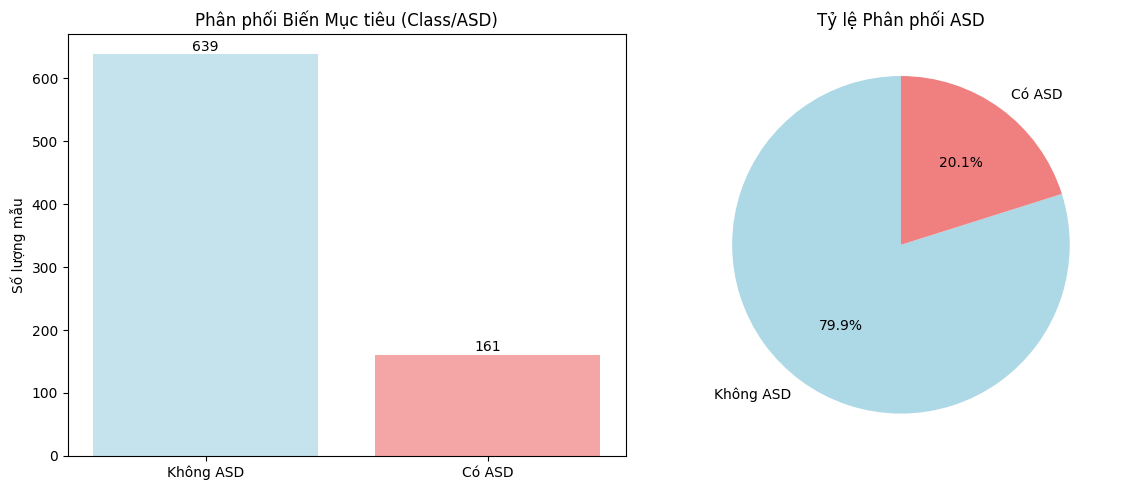

In [ ]:
# Phân tích biến mục tiêu Class/ASD
print("\n2. PHÂN TÍCH BIẾN MỤC TIÊU (Class/ASD)")
print("-" * 40)

# Thống kê phân phối
asd_distribution = df['Class/ASD'].value_counts()
asd_percentage = df['Class/ASD'].value_counts(normalize=True) * 100

print(f"Phân phối lớp:")
print(f"   - Lớp 0 (Không ASD): {asd_distribution[0]} mẫu ({asd_percentage[0]:.1f}%)")
print(f"   - Lớp 1 (Có ASD): {asd_distribution[1]} mẫu ({asd_percentage[1]:.1f}%)")

# Visualization phân phối biến mục tiêu
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Biểu đồ cột
axes[0].bar(['Không ASD', 'Có ASD'], asd_distribution.values, 
           color=['lightblue', 'lightcoral'], alpha=0.7)
axes[0].set_title('Phân phối Biến Mục tiêu (Class/ASD)')
axes[0].set_ylabel('Số lượng mẫu')
for i, v in enumerate(asd_distribution.values):
    axes[0].text(i, v + 0.1, str(v), ha='center', va='bottom')

# Biểu đồ tròn
colors = ['lightblue', 'lightcoral']
axes[1].pie(asd_distribution.values, labels=['Không ASD', 'Có ASD'], 
           autopct='%1.1f%%', colors=colors, startangle=90)
axes[1].set_title('Tỷ lệ Phân phối ASD')

plt.tight_layout()
plt.show()

In [7]:
# Phân tích cấu trúc và kiểu dữ liệu
print("\n3. PHÂN TÍCH CẤU TRÚC DỮ LIỆU")
print("-" * 40)

# Thông tin tổng quan về dataset
print("Thông tin dataset:")
print(df.info())

# Phân loại các features
print("\nPHÂN LOẠI CÁC FEATURES:")
print("-" * 30)

# Phân tích các nhóm features
aq_scores = [f'A{i}_Score' for i in range(1, 11)]
demographic_features = ['age', 'gender', 'ethnicity', 'jaundice', 'austim', 
                       'contry_of_res', 'used_app_before', 'result', 'age_desc', 'relation']
target_feature = ['Class/ASD']

print(f"AQ Score Features (10 features): {aq_scores}")
print(f"Demographic Features ({len(demographic_features)} features): {demographic_features}")
print(f"Target Feature: {target_feature}")

# Kiểm tra missing values
print("\nPHÂN TÍCH MISSING VALUES:")
print("-" * 30)
missing_data = df.isnull().sum()
print(missing_data)


3. PHÂN TÍCH CẤU TRÚC DỮ LIỆU
----------------------------------------
Thông tin dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           

In [9]:
# hiển thị tất cả các cột của một khung dữ liệu
pd.set_option('display.max_columns', None)

# Xem 5 dòng đầu tiên
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38.172746,f,?,no,no,Austria,no,6.351166,adult,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47.750517,m,?,no,no,India,no,2.255185,adult,Self,0
2,3,1,1,1,1,1,1,1,1,1,1,7.380373,m,White-European,no,yes,United States,no,14.851484,child,Self,1
3,4,0,0,0,0,0,0,0,0,0,0,23.561927,f,?,no,no,United States,no,2.276617,young adult,Self,0
4,5,0,0,0,0,0,0,0,0,0,0,43.205790,m,?,no,no,South Africa,no,-4.777286,adult,Self,0


In [10]:
# Xem 5 dòng cuối cùng
df.tail()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
795,796,0,1,0,0,0,0,0,0,1,1,16.597187,m,Hispanic,no,no,New Zealand,no,12.999501,teen,Self,0
796,797,0,1,1,0,0,1,0,1,1,1,20.703001,m,White-European,no,no,Cyprus,no,13.561518,young adult,Self,0
797,798,0,0,0,0,0,0,0,0,0,0,5.711481,m,South Asian,yes,no,New Zealand,no,2.653177,child,Self,0
798,799,0,0,0,0,0,0,0,0,0,0,16.414305,f,?,no,no,Canada,no,9.069342,teen,Self,0
799,800,0,1,0,0,0,0,0,0,0,0,46.966113,f,?,no,no,United Arab Emirates,yes,2.243304,adult,Self,0


In [8]:
# Xem thông tin về dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [37]:
# Thống kê mô tả cho các biến số
print("\n4. THỐNG KÊ MÔ TẢ CHO BIẾN SỐ")
print("-" * 40)

numeric_columns = ['age', 'result']
print("Thống kê biến số:")
numeric_stats = df[numeric_columns].describe()
print(numeric_stats)

# Thống kê cho biến phân loại
print("\nTHỐNG KÊ BIẾN PHÂN LOẠI:")
print("-" * 30)

categorical_columns = ['gender', 'ethnicity', 'jaundice', 'austim', 
                      'contry_of_res', 'used_app_before', 'age_desc', 'relation']

for col in categorical_columns:
    value_counts = df[col].value_counts()
    print(f"\n{col}:")
    for value, count in value_counts.items():
        percentage = (count / len(df)) * 100
        print(f"  - {value}: {count} ({percentage:.1f}%)")


4. THỐNG KÊ MÔ TẢ CHO BIẾN SỐ
----------------------------------------
Thống kê biến số:
              age      result
count  800.000000  800.000000
mean    28.452118    8.537303
std     16.310966    4.807676
min      2.718550   -6.137748
25%     17.198153    5.306575
50%     24.848350    9.605299
75%     35.865429   12.514484
max     89.461718   15.853126

THỐNG KÊ BIẾN PHÂN LOẠI:
------------------------------

gender:
  - m: 530 (66.2%)
  - f: 270 (33.8%)

ethnicity:
  - White-European: 257 (32.1%)
  - ?: 203 (25.4%)
  - Middle Eastern : 97 (12.1%)
  - Asian: 67 (8.4%)
  - Black: 47 (5.9%)
  - South Asian: 34 (4.2%)
  - Pasifika: 32 (4.0%)
  - Others: 29 (3.6%)
  - Latino: 17 (2.1%)
  - Hispanic: 9 (1.1%)
  - Turkish: 5 (0.6%)
  - others: 3 (0.4%)

jaundice:
  - no: 615 (76.9%)
  - yes: 185 (23.1%)

austim:
  - no: 669 (83.6%)
  - yes: 131 (16.4%)

contry_of_res:
  - United States: 134 (16.8%)
  - India: 108 (13.5%)
  - New Zealand: 78 (9.8%)
  - United Kingdom: 67 (8.4%)
  - Jorda

Nhận thấy cột age có kiểu data là float nên chuyển sang int

In [11]:
# chuyển đổi cột "age" từ kiểu dữ liệu float sang int
df["age"] = df["age"].astype(int)

# bỏ cột id
df = df.drop('ID', axis=1)
df.head(2)



,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,adult,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,adult,Self,0


In [71]:
# Kiểm tra các giá trị duy nhất trong mỗi cột trừ các cột số(age, result)
for col in df.columns:
  numerical_features = ["age", "result"]
  if col not in numerical_features:
    print(col, df[col].unique())
    print("-"*50)

A1_Score [1 0]
--------------------------------------------------
A2_Score [0 1]
--------------------------------------------------
A3_Score [1 0]
--------------------------------------------------
A4_Score [0 1]
--------------------------------------------------
A5_Score [1 0]
--------------------------------------------------
A6_Score [0 1]
--------------------------------------------------
A7_Score [1 0]
--------------------------------------------------
A8_Score [0 1]
--------------------------------------------------
A9_Score [1 0]
--------------------------------------------------
A10_Score [1 0]
--------------------------------------------------
gender ['f' 'm']
--------------------------------------------------
ethnicity ['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
--------------------------------------------------
jaundice ['no' 'yes']
--------------------------------------------------
austim

Các cột ethnicity và relation đang còn có các row bị khuyết('?') và sẽ thay thế '?' bằng 'Others'


Cột ethnicity và contry_of_res có những giá trị sai định dạng hoặc các giá trị tương tự hoặc đồng nghĩa (ví dụ: "Hong Kong" → "China", "AmericanSamoa" → “United States”, "others" -> "Others", ...).

In [12]:
# Thay thế các giá trị sai định dạng hoặc đồng nghĩa trong các cột
df["ethnicity"] = df["ethnicity"].replace({"?": "Others", "others": "Others"})
df["relation"] = df["relation"].replace({"?": "Others"})

mapping = {
    "Viet Nam": "Vietnam",
    "AmericanSamoa": "United States",
    "Hong Kong": "China"
}
df["contry_of_res"] = df["contry_of_res"].replace(mapping)

print(df["contry_of_res"].unique())
print(df["ethnicity"].unique())
print(df["relation"].unique())

['Austria' 'India' 'United States' 'South Africa' 'Jordan'
 'United Kingdom' 'Brazil' 'New Zealand' 'Canada' 'Kazakhstan'
 'United Arab Emirates' 'Australia' 'Ukraine' 'Iraq' 'France' 'Malaysia'
 'Vietnam' 'Egypt' 'Netherlands' 'Afghanistan' 'Oman' 'Italy' 'Bahamas'
 'Saudi Arabia' 'Ireland' 'Aruba' 'Sri Lanka' 'Russia' 'Bolivia'
 'Azerbaijan' 'Armenia' 'Serbia' 'Ethiopia' 'Sweden' 'Iceland' 'China'
 'Angola' 'Germany' 'Spain' 'Tonga' 'Pakistan' 'Iran' 'Argentina' 'Japan'
 'Mexico' 'Nicaragua' 'Sierra Leone' 'Czech Republic' 'Niger' 'Romania'
 'Cyprus' 'Belgium' 'Burundi' 'Bangladesh']
['Others' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Hispanic'
 'Asian' 'Turkish' 'South Asian' 'Latino']
['Self' 'Relative' 'Parent' 'Others' 'Health care professional']


In [42]:
# Thống kê mô tả các cột số
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD,AQ_Total_Calculated
count,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,27.963750,8.537303,0.201250,4.672500
std,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.329827,4.807676,0.401185,3.494712
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-6.137748,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,5.306575,0.000000,1.000000
50%,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.000000,9.605299,0.000000,4.000000
75%,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.250000,12.514484,0.000000,8.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.000000,15.853126,1.000000,10.000000


Mean: 27.96375
Median: 24.0


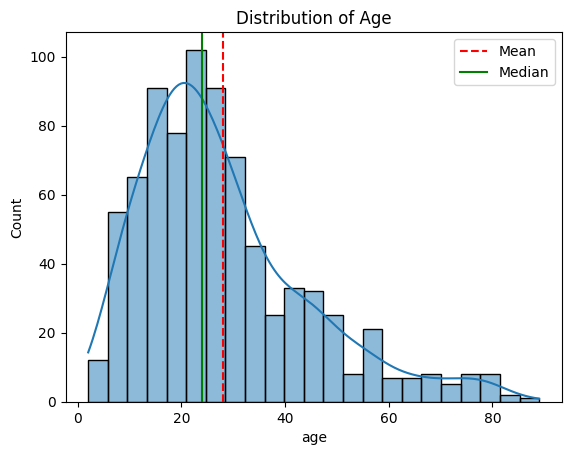

In [43]:
# Biểu đồ phân phối cho age

sns.histplot(df["age"], kde=True)
plt.title("Distribution of Age")

# tính mean và median của age
age_mean = df["age"].mean()
age_median = df["age"].median()

print("Mean:", age_mean)
print("Median:", age_median)


# vẽ mean và median trên biểu đồ
plt.axvline(age_mean, color="red", linestyle="--", label="Mean")
plt.axvline(age_median, color="green", linestyle="-", label="Median")

plt.legend()

plt.show()

Mean: 8.537303106501248
Median: 9.605299308


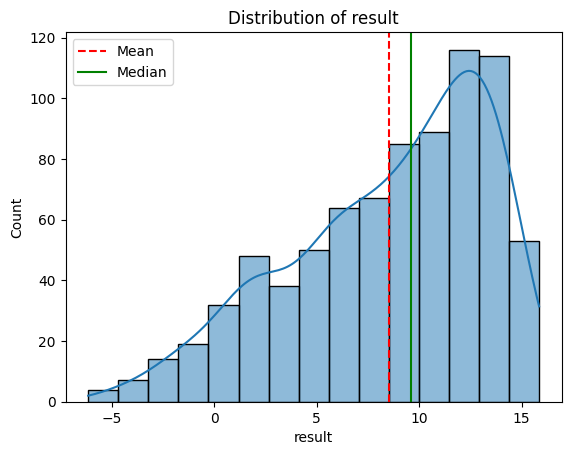

In [44]:
# Biểu đồ phân phối cho "result"

sns.histplot(df["result"], kde=True)
plt.title("Distribution of result")

# tính mean và median của result
result_mean = df["result"].mean()
result_median = df["result"].median()

print("Mean:", result_mean)
print("Median:", result_median)


# vẽ mean và median trên biểu đồ
plt.axvline(result_mean, color="red", linestyle="--", label="Mean")
plt.axvline(result_median, color="green", linestyle="-", label="Median")

plt.legend()

plt.show()

**Biểu đồ hộp để xác định các giá trị ngoại lai(outliers ) trong các cột số**

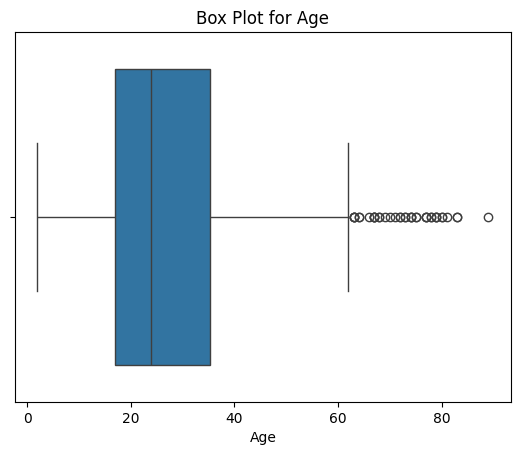

In [45]:
# box plot
sns.boxplot(x=df["age"])
plt.title("Box Plot for Age")
plt.xlabel("Age")
plt.show()

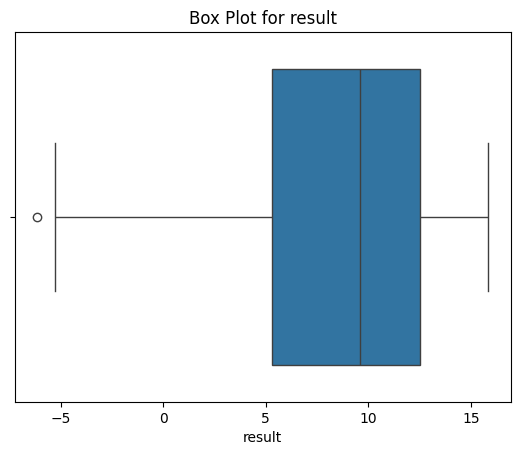

In [46]:
# box plot
sns.boxplot(x=df["result"])
plt.title("Box Plot for result")
plt.xlabel("result")
plt.show()

Chuyển đổi dữ liệu và chuẩn hóa giá trị

In [33]:
for col in df.columns:
  numerical_features = ["age", "result"]
  if col not in numerical_features:
    print(col, df[col].unique())
    print("-"*50)

A1_Score [1 0]
--------------------------------------------------
A2_Score [0 1]
--------------------------------------------------
A3_Score [1 0]
--------------------------------------------------
A4_Score [0 1]
--------------------------------------------------
A5_Score [1 0]
--------------------------------------------------
A6_Score [0 1]
--------------------------------------------------
A7_Score [1 0]
--------------------------------------------------
A8_Score [0 1]
--------------------------------------------------
A9_Score [1 0]
--------------------------------------------------
A10_Score [1 0]
--------------------------------------------------
gender ['f' 'm']
--------------------------------------------------
ethnicity ['Others' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Hispanic'
 'Asian' 'Turkish' 'South Asian' 'Latino']
--------------------------------------------------
jaundice ['no' 'yes']
--------------------------------------------------
austim ['no' 'yes']

Nhận xét: Sử dụng One-hot cho gender, ethnicity, jaundice, austim, used_app_before, age_desc, relation và contry_of_res dùng target encoding để số chiều hạn chế tăng số chiều vì có nhiều quốc gia

age và result sẽ chuẩn hóa giá trị theo StandardScaler

In [13]:
# xác định các cột có kiểu dữ liệu object
object_columns = df.select_dtypes(include=["object"]).columns
print(object_columns)

Index(['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'age_desc', 'relation'],
      dtype='object')


Biến đổi dữ liệu hiển thị dữ liệu sau khi tiền xử lý

In [36]:
import importlib
import src.preprocessing
importlib.reload(src.preprocessing)

<module 'src.preprocessing' from 'd:\\Dev\\machine_learning\\AUTISM_PREDICTION_PROJECT\\notebooks\\src\\preprocessing.py'>

In [53]:
from src.preprocessing import build_preprocessor


target = df['Class/ASD']
X = df.drop('Class/ASD', axis=1)
preprocessor = build_preprocessor(X, target)

X_processed = preprocessor.transform(X)

#Chuyển vè DataFrame
num_features = ["age", "result"]
label_features = ["gender", "jaundice", "austim", "used_app_before", "age_desc"]
target_features = ["ethnicity", "country_of_res", "relation"]
binary_features = [f"A{i}_Score" for i in range(1, 11)]

all_features = num_features + label_features + target_features + binary_features
df_processed = pd.DataFrame(X_processed, columns=all_features)
df_processed['Class/ASD'] = target

df_processed.head()

,age,result,gender,jaundice,austim,used_app_before,age_desc,ethnicity,country_of_res,relation,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Class/ASD
0,0.614981,-0.455003,0.0,0.0,0.0,0.0,3.0,0.038457,0.058150,0.207326,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0
1,1.166464,-1.307503,1.0,0.0,0.0,0.0,3.0,0.038457,0.028047,0.207326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,-1.284574,1.314176,1.0,0.0,1.0,0.0,0.0,0.469201,0.496671,0.207326,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
3,-0.304158,-1.303042,0.0,0.0,0.0,0.0,2.0,0.038457,0.496671,0.207326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.921360,-2.771177,1.0,0.0,0.0,0.0,3.0,0.038457,0.000000,0.207326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


Ma trận tương quan giữa các features, target

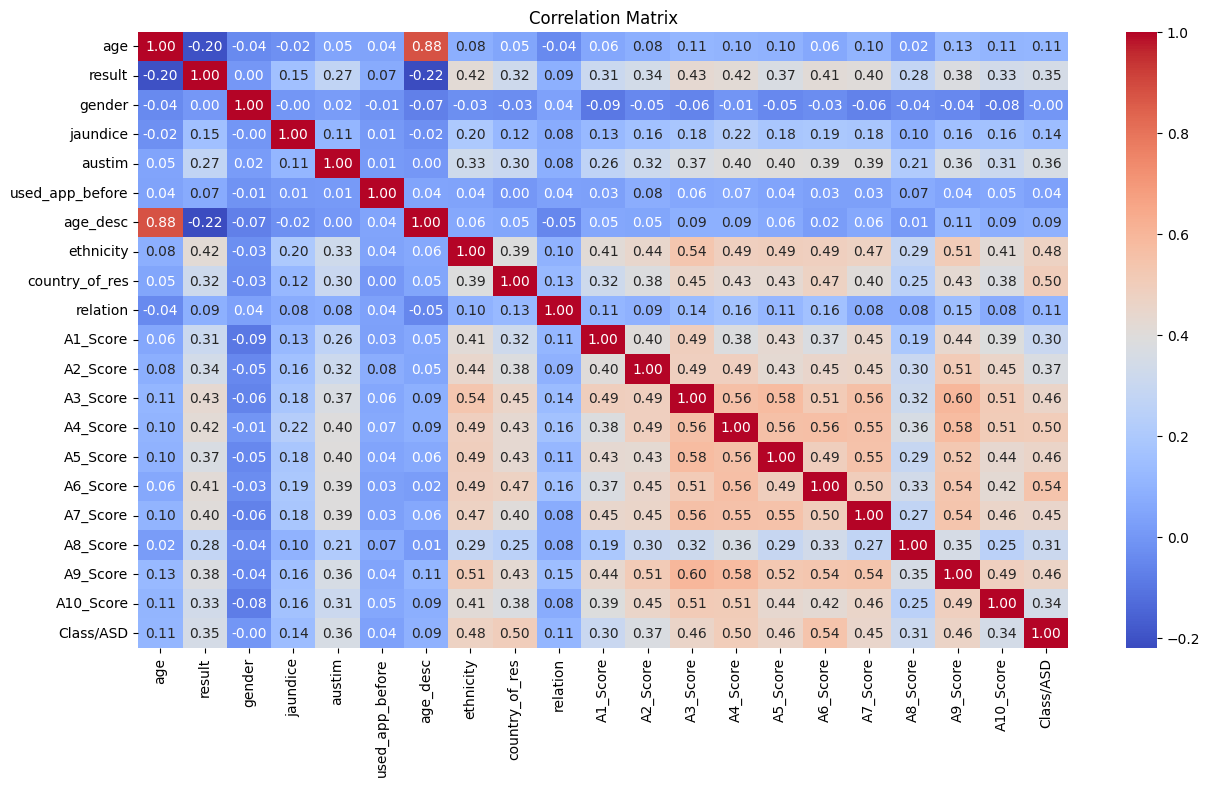

In [54]:
plt.figure(figsize=(15, 8))
sns.heatmap(df_processed.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


Loại bỏ cột age_desc vì đa cộng tuyến mạnh với cột age

In [50]:
df_processed = df_processed.drop('age_desc', axis=1)

df_processed.head()


,age,result,gender,jaundice,austim,used_app_before,ethnicity,country_of_res,relation,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Class/ASD
0,0.614981,-0.455003,0.0,0.0,0.0,0.0,0.038457,0.058150,0.207326,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0
1,1.166464,-1.307503,1.0,0.0,0.0,0.0,0.038457,0.028047,0.207326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,-1.284574,1.314176,1.0,0.0,1.0,0.0,0.469201,0.496671,0.207326,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
3,-0.304158,-1.303042,0.0,0.0,0.0,0.0,0.038457,0.496671,0.207326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.921360,-2.771177,1.0,0.0,0.0,0.0,0.038457,0.000000,0.207326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [51]:
# Thống kê lại sau khi các dữ liệu đã được tiền xử lý
df_processed.head()

#Lưu dữ liệu đã tiền xử lý để thực hiện giảm chiều
df_processed.to_csv('../data/processed/data_processed.csv')